In [1]:
import pandas as pd
df = pd.read_csv("vehicule_1905.csv")
df_cleaned = df.dropna()
print("Nombre de lignes avant la suppression des valeurs manquantes:", len(df))
print("Nombre de lignes après la suppression des valeurs manquantes:", len(df_cleaned))
df_cleaned.to_csv("vehicule_nomissinng.csv", index=False)
print(df_cleaned.head())


Nombre de lignes avant la suppression des valeurs manquantes: 193951
Nombre de lignes après la suppression des valeurs manquantes: 181455
   NUM_ACC  NUM_ORD_VEH  COD_TYP_VEH  COD_USA_VEH  COD_PAY_ORI  AGE_CON  \
0     8580            2            1            0          0.0     47.0   
1     8581            1            3            0          0.0     36.0   
2     8581            2            1            0          0.0     17.0   
3     8581            3            1            0          0.0     22.0   
4     8582            1            3            4          0.0     37.0   

   SEX_CON  COD_NAT_CON  COD_PRF_CON  COD_TRA  COD_TUE  COD_BLE  COD_FAU_CON  \
0      1.0          0.0          6.0      0.0        1        0            5   
1      1.0          0.0          6.0      0.0        0        0            9   
2      1.0          0.0          9.0      0.0        1        0            4   
3      1.0          0.0          9.0      0.0        0        0            9   
4      1.0 

In [2]:
import pandas as pd
import numpy as np
df_cleaned = pd.read_csv("vehicule_nomissinng.csv")
missing_percentage = 0.1  
total_cells = df_cleaned.shape[0] * df_cleaned.shape[1]
num_missing_cells = int(total_cells * missing_percentage)
missing_indices = np.random.choice(total_cells, size=num_missing_cells, replace=False)
for idx in missing_indices:
    row_idx = idx // df_cleaned.shape[1]
    col_idx = idx % df_cleaned.shape[1]
    df_cleaned.iat[row_idx, col_idx] = np.nan
df_cleaned.to_csv("vehicule_with_missinng.csv", index=False)

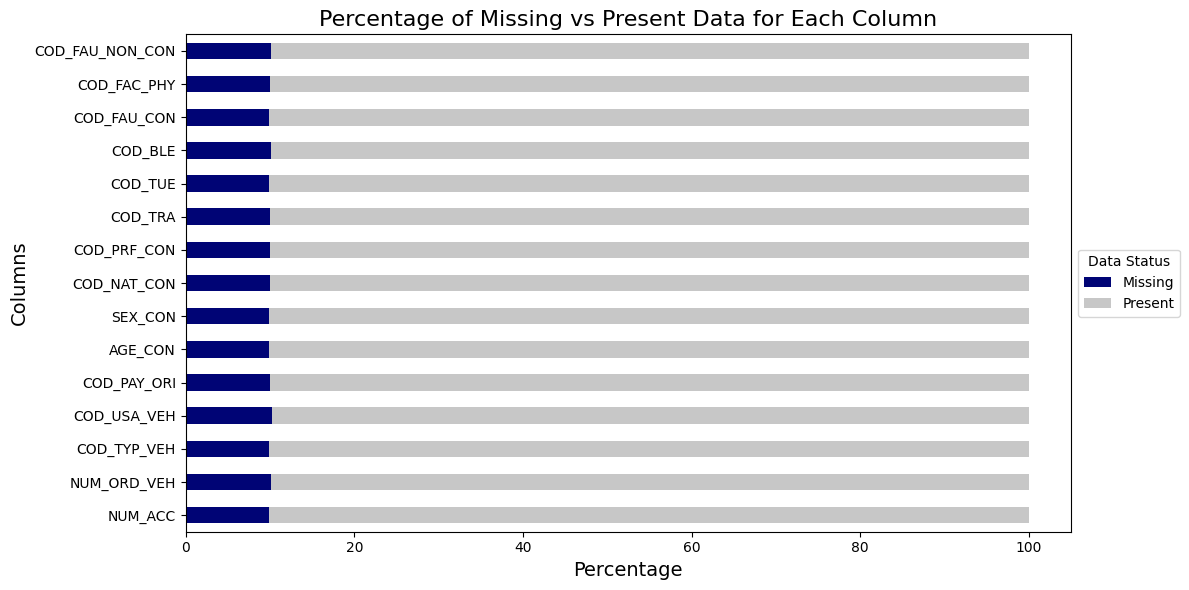

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
chemin_fichier = 'vehicule_with_missinng.csv'
df = pd.read_csv(chemin_fichier)
missing_percent = (df.isnull().sum() / len(df)) * 100
present_percent = 100 - missing_percent
missing_percent = (df.isnull().sum() / len(df)) * 100
present_percent = 100 - missing_percent
plot_data = pd.DataFrame({
    'Missing': missing_percent,
    'Present': present_percent
})
fig, ax = plt.subplots(figsize=(12, 6))
plot_data.plot(kind='barh', stacked=True, color=['#000475', '#c7c7c7'], ax=ax)
ax.set_title('Percentage of Missing vs Present Data for Each Column', fontsize=16)
ax.set_xlabel('Percentage', fontsize=14)
ax.set_ylabel('Columns', fontsize=14)
ax.legend(title='Data Status', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

**methode knn**

In [6]:
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np
chemin_fichier = 'vehicule_with_missinng.csv'
df = pd.read_csv(chemin_fichier)
categorical_cols = ['SEX_CON']
numerical_cols = ['AGE_CON']
knn_imputer_cat = KNNImputer()
df[categorical_cols] = knn_imputer_cat.fit_transform(df[categorical_cols])
knn_imputer_num = KNNImputer()
df[numerical_cols] = knn_imputer_num.fit_transform(df[numerical_cols])
print(df.head())
df.to_csv("vehicule_knn.csv", index=False)


   NUM_ACC  NUM_ORD_VEH  COD_TYP_VEH  COD_USA_VEH  COD_PAY_ORI    AGE_CON  \
0   8580.0          2.0          NaN          0.0          0.0  37.376862   
1   8581.0          1.0          3.0          0.0          0.0  36.000000   
2   8581.0          2.0          1.0          0.0          0.0  17.000000   
3   8581.0          3.0          1.0          0.0          0.0  22.000000   
4   8582.0          1.0          3.0          4.0          0.0  37.000000   

   SEX_CON  COD_NAT_CON  COD_PRF_CON  COD_TRA  COD_TUE  COD_BLE  COD_FAU_CON  \
0      1.0          0.0          6.0      0.0      1.0      0.0          5.0   
1      1.0          0.0          6.0      0.0      0.0      0.0          9.0   
2      1.0          0.0          9.0      0.0      1.0      0.0          4.0   
3      1.0          0.0          9.0      0.0      NaN      0.0          9.0   
4      1.0          0.0          NaN      0.0      0.0      0.0          9.0   

   COD_FAC_PHY  COD_FAU_NON_CON  
0          9.0        

In [9]:
import pandas as pd
from sklearn.metrics import accuracy_score, mean_absolute_error
import numpy as np

df_original = pd.read_csv("vehicule_nomissinng.csv")
df_imputed = pd.read_csv("vehicule_knn.csv")
original_SEX_CON = df_original["SEX_CON"].dropna().astype(int)
imputed_SEX_CON = df_imputed["SEX_CON"].dropna().astype(int)

original_AGE_CON = df_original["AGE_CON"].dropna().astype(int)
imputed_AGE_CON = df_imputed["AGE_CON"].dropna().astype(int)
original_SEX_CON = original_SEX_CON.reset_index(drop=True)
imputed_SEX_CON = imputed_SEX_CON.reset_index(drop=True)
original_AGE_CON = original_AGE_CON.reset_index(drop=True)
imputed_AGE_CON = imputed_AGE_CON.reset_index(drop=True)

if len(original_SEX_CON) == len(imputed_SEX_CON):
    accuracy_SEX_CON = accuracy_score(original_SEX_CON, imputed_SEX_CON)
    print("Accuracy of SEX_CON column:", accuracy_SEX_CON)
else:
    print("Error: The lengths of original and imputed data do not match for SEX_CON.")
if len(original_AGE_CON) == len(imputed_AGE_CON):
    mae_AGE_CON = mean_absolute_error(original_AGE_CON, imputed_AGE_CON)
    print("MAE for AGE_CON column:", mae_AGE_CON)
else:
    print("Error: The lengths of original and imputed data do not match for AGE_CON.")


Accuracy of SEX_CON column: 0.9928246672728775
MAE for AGE_CON column: 1.1210107189110248


In [11]:
pourcentage_valeurs_manquantes = (df_imputed.isnull().sum() / len(df_imputed)) * 100
print("Missing Values Rate (%):")
missing_values_rate_df = pd.DataFrame(pourcentage_valeurs_manquantes, columns=['Rate'])
missing_values_rate_df.index.name = 'Column'
missing_values_rate_df.style.set_caption('Missing Values Rate (%)').\
    highlight_null('red').\
    format({'Rate': '{:.2f}%'.format})

Missing Values Rate (%):


,Rate
Column,
NUM_ACC,9.93%
NUM_ORD_VEH,10.08%
COD_TYP_VEH,9.85%
COD_USA_VEH,10.22%
COD_PAY_ORI,10.02%
AGE_CON,0.00%
SEX_CON,0.00%
COD_NAT_CON,10.04%
COD_PRF_CON,10.01%


Interpretation:

Scale-Dependent: Like RMSE, MAE is scale-dependent and should be used in the context of the scale of the data.
Less Sensitive to Outliers: MAE is not as sensitive to outliers as MSE or RMSE. Each error contributes in proportion to the absolute value of the error.
Interpretable: Provides a direct average error magnitude per observation.


With a Mean Absolute Error (MAE) of approximately 0.284 for the "MOIS_ACC" column, we can interpret the performance of the imputation method as follows:

Small MAE: A MAE of 0.284 indicates that, on average, the imputed values for "MOIS_ACC" deviate by approximately 0.284 units from the original values.
Relative to the scale of the data: Considering the range of the "MOIS_ACC" variable (11.0), an MAE of 0.284 is relatively small. This suggests that the imputed values are close to the original values on average, compared to the variability present in the data.
Performance assessment: While the interpretation of whether an MAE is "good" or not depends on the specific context and requirements of the problem, an MAE of 0.284 can generally be considered low, indicating that the imputation method is providing accurate estimates for the missing values in the "MOIS_ACC" column.

moyenne et mode

In [13]:
import pandas as pd

df_missing = pd.read_csv("vehicule_with_missinng.csv")
mois_acc_mean = df_missing['AGE_CON'].mean()
df_missing['AGE_CON'] = df_missing['AGE_CON'].fillna(mois_acc_mean)
cod_lumiere_mode = df_missing['SEX_CON'].mode()[0]
df_missing['SEX_CON'] = df_missing['SEX_CON'].fillna(cod_lumiere_mode)
print(df_missing.head())
df_missing.to_csv("vehicule_imputed_mode_mean.csv", index=False)

   NUM_ACC  NUM_ORD_VEH  COD_TYP_VEH  COD_USA_VEH  COD_PAY_ORI    AGE_CON  \
0   8580.0          2.0          NaN          0.0          0.0  37.376862   
1   8581.0          1.0          3.0          0.0          0.0  36.000000   
2   8581.0          2.0          1.0          0.0          0.0  17.000000   
3   8581.0          3.0          1.0          0.0          0.0  22.000000   
4   8582.0          1.0          3.0          4.0          0.0  37.000000   

   SEX_CON  COD_NAT_CON  COD_PRF_CON  COD_TRA  COD_TUE  COD_BLE  COD_FAU_CON  \
0      1.0          0.0          6.0      0.0      1.0      0.0          5.0   
1      1.0          0.0          6.0      0.0      0.0      0.0          9.0   
2      1.0          0.0          9.0      0.0      1.0      0.0          4.0   
3      1.0          0.0          9.0      0.0      NaN      0.0          9.0   
4      1.0          0.0          NaN      0.0      0.0      0.0          9.0   

   COD_FAC_PHY  COD_FAU_NON_CON  
0          9.0        

In [14]:
pourcentage_valeurs_manquantes = (df_missing.isnull().sum() / len(df_missing)) * 100
print("Missing Values Rate (%):")
missing_values_rate_df = pd.DataFrame(pourcentage_valeurs_manquantes, columns=['Rate'])
missing_values_rate_df.index.name = 'Column'
missing_values_rate_df.style.set_caption('Missing Values Rate (%)').\
    highlight_null('red').\
    format({'Rate': '{:.2f}%'.format})

Missing Values Rate (%):


,Rate
Column,
NUM_ACC,9.93%
NUM_ORD_VEH,10.08%
COD_TYP_VEH,9.85%
COD_USA_VEH,10.22%
COD_PAY_ORI,10.02%
AGE_CON,0.00%
SEX_CON,0.00%
COD_NAT_CON,10.04%
COD_PRF_CON,10.01%


In [19]:
import pandas as pd
from sklearn.metrics import accuracy_score, mean_absolute_error
import numpy as np

df_original = pd.read_csv("vehicule_nomissinng.csv")
df_imputed = pd.read_csv("vehicule_imputed_mode_mean.csv")

original_SEX_CON = df_original["SEX_CON"].dropna().astype(int)
imputed_SEX_CON = df_imputed["SEX_CON"].dropna().astype(int)

original_AGE_CON = df_original["AGE_CON"].dropna().astype(int)
imputed_AGE_CON = df_imputed["AGE_CON"].dropna().astype(int)

original_SEX_CON = original_SEX_CON.reset_index(drop=True)
imputed_SEX_CON = imputed_SEX_CON.reset_index(drop=True)
original_AGE_CON = original_AGE_CON.reset_index(drop=True)
imputed_AGE_CON = imputed_AGE_CON.reset_index(drop=True)

if len(original_SEX_CON) == len(imputed_SEX_CON):
    accuracy_SEX_CON = accuracy_score(original_SEX_CON, imputed_SEX_CON)
    print("Accuracy of SEX_CON column:", accuracy_SEX_CON)
else:
    print("Error: The lengths of original and imputed data do not match for SEX_CON.")

if len(original_AGE_CON) == len(imputed_AGE_CON):
    mae_AGE_CON = mean_absolute_error(original_AGE_CON, imputed_AGE_CON)
    print("MAE for AGE_CON column:", mae_AGE_CON)
else:
    print("Error: The lengths of original and imputed data do not match for AGE_CON.")


Accuracy of SEX_CON column: 0.9928246672728775
MAE for AGE_CON column: 1.1210107189110248


Missforest

In [20]:
import pandas as pd
import numpy as np
df_cleaned = pd.read_csv("vehicule__MISSFOREST_imputedV2.csv")

In [21]:
pourcentage_valeurs_manquantes = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
print("Missing Values Rate (%):")
missing_values_rate_df = pd.DataFrame(pourcentage_valeurs_manquantes, columns=['Rate'])
missing_values_rate_df.index.name = 'Column'
missing_values_rate_df.style.set_caption('Missing Values Rate (%)').\
    highlight_null('red').\
    format({'Rate': '{:.2f}%'.format})

Missing Values Rate (%):


,Rate
Column,
NUM_ACC,9.93%
NUM_ORD_VEH,10.08%
COD_TYP_VEH,9.85%
COD_USA_VEH,10.22%
COD_PAY_ORI,10.02%
AGE_CON,0.00%
SEX_CON,0.00%
COD_NAT_CON,10.04%
COD_PRF_CON,10.01%


In [23]:
import pandas as pd
from sklearn.metrics import accuracy_score, mean_absolute_error
import numpy as np

df_original = pd.read_csv("vehicule_nomissinng.csv")
df_imputed = pd.read_csv("vehicule__MISSFOREST_imputedV2.csv")
original_SEX_CON = df_original["SEX_CON"].dropna().astype(int)
imputed_SEX_CON = df_imputed["SEX_CON"].dropna().astype(int)

original_AGE_CON = df_original["AGE_CON"].dropna().astype(int)
imputed_AGE_CON = df_imputed["AGE_CON"].dropna().astype(int)

original_SEX_CON = original_SEX_CON.reset_index(drop=True)
imputed_SEX_CON = imputed_SEX_CON.reset_index(drop=True)
original_AGE_CON = original_AGE_CON.reset_index(drop=True)
imputed_AGE_CON = imputed_AGE_CON.reset_index(drop=True)

if len(original_SEX_CON) == len(imputed_SEX_CON):
    accuracy_SEX_CON = accuracy_score(original_SEX_CON, imputed_SEX_CON)
    print("Accuracy of SEX_CON column:", accuracy_SEX_CON)
else:
    print("Error: The lengths of original and imputed data do not match for SEX_CON.")

if len(original_AGE_CON) == len(imputed_AGE_CON):
    mae_AGE_CON = mean_absolute_error(original_AGE_CON, imputed_AGE_CON)
    print("MAE for AGE_CON column:", mae_AGE_CON)
else:
    print("Error: The lengths of original and imputed data do not match for AGE_CON.")

Accuracy of SEX_CON column: 0.988763054200766
MAE for AGE_CON column: 1.5661128103386515


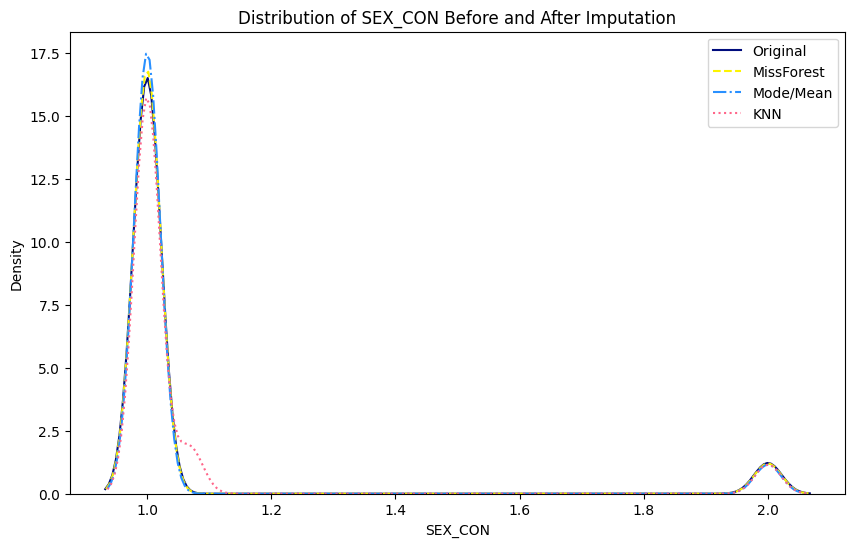

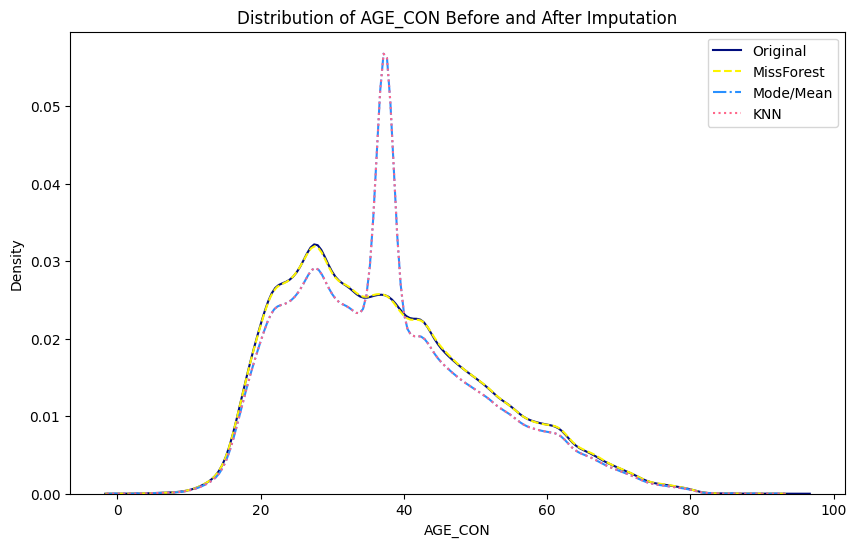

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [31]:
import pandas as pd
from sklearn.metrics import accuracy_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
df_original = pd.read_csv("vehicule_nomissinng.csv")
df_missforest = pd.read_csv("vehicule__MISSFOREST_imputedV2.csv")
df_mode_mean = pd.read_csv("vehicule_imputed_mode_mean.csv")
df_knn = pd.read_csv("vehicule_knn.csv")

# Extract the SEX_CON and AGE_CON columns
sex_con_original = df_original['SEX_CON']
sex_con_missforest = df_missforest['SEX_CON']
sex_con_mode_mean = df_mode_mean['SEX_CON']
sex_con_knn = df_knn['SEX_CON']

age_con_original = df_original['AGE_CON']
age_con_missforest = df_missforest['AGE_CON']
age_con_mode_mean = df_mode_mean['AGE_CON']
age_con_knn = df_knn['AGE_CON']

# Plotting the distributions for SEX_CON
colors = ['#fcf400', '#2990ff','#ff668a', '#000c7d']
plt.figure(figsize=(10, 6))
sns.kdeplot(sex_con_original, label='Original', color=colors[3], linestyle='-')
sns.kdeplot(sex_con_missforest, label='MissForest', color=colors[0], linestyle='--')
sns.kdeplot(sex_con_mode_mean, label='Mode/Mean', color=colors[1], linestyle='-.')
sns.kdeplot(sex_con_knn, label='KNN', color=colors[2], linestyle=':')

plt.xlabel('SEX_CON')
plt.ylabel('Density')
plt.title('Distribution of SEX_CON Before and After Imputation')
plt.legend()
plt.show()

# Plotting the distributions for AGE_CON
plt.figure(figsize=(10, 6))
sns.kdeplot(age_con_original, label='Original', color=colors[3], linestyle='-')
sns.kdeplot(age_con_missforest, label='MissForest', color=colors[0], linestyle='--')
sns.kdeplot(age_con_mode_mean, label='Mode/Mean', color=colors[1], linestyle='-.')
sns.kdeplot(age_con_knn, label='KNN', color=colors[2], linestyle=':')

plt.xlabel('AGE_CON')
plt.ylabel('Density')
plt.title('Distribution of AGE_CON Before and After Imputation')
plt.legend()
plt.show()
fig.write_image("imputation_distribution.png", width=800, height=600)

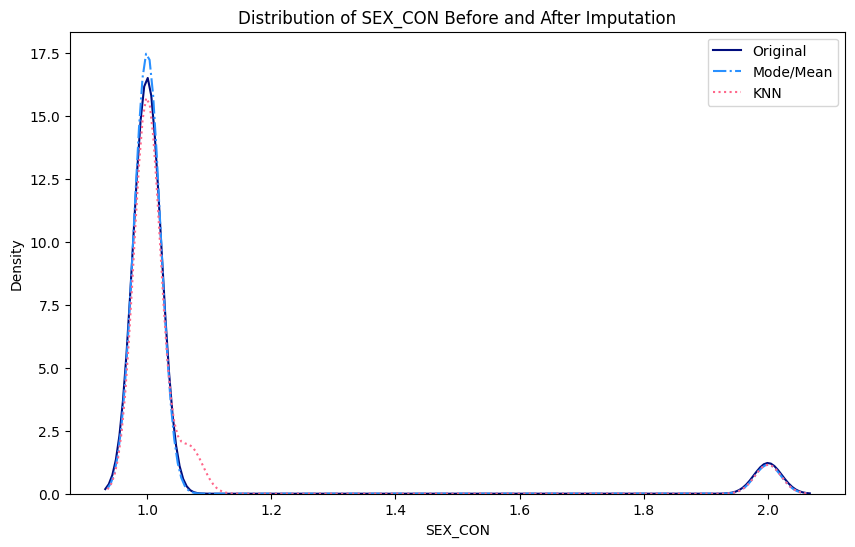

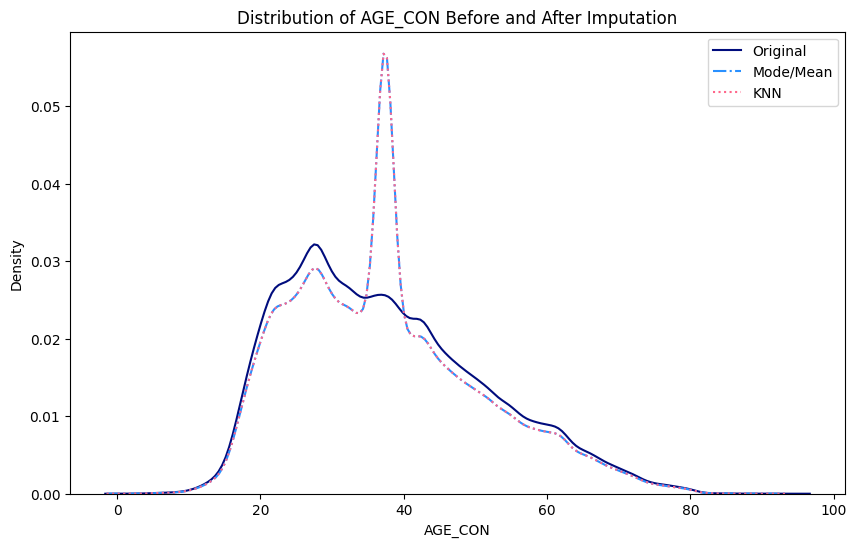

<Figure size 640x480 with 0 Axes>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
df_original = pd.read_csv("vehicule_nomissinng.csv")
df_mode_mean = pd.read_csv("vehicule_imputed_mode_mean.csv")
df_knn = pd.read_csv("vehicule_knn.csv")

# Extract the SEX_CON and AGE_CON columns
sex_con_original = df_original['SEX_CON']
sex_con_mode_mean = df_mode_mean['SEX_CON']
sex_con_knn = df_knn['SEX_CON']

age_con_original = df_original['AGE_CON']
age_con_mode_mean = df_mode_mean['AGE_CON']
age_con_knn = df_knn['AGE_CON']

# Plotting the distributions for SEX_CON
colors = ['#2990ff', '#ff668a', '#000c7d']
plt.figure(figsize=(10, 6))
sns.kdeplot(sex_con_original, label='Original', color=colors[2], linestyle='-')
sns.kdeplot(sex_con_mode_mean, label='Mode/Mean', color=colors[0], linestyle='-.')
sns.kdeplot(sex_con_knn, label='KNN', color=colors[1], linestyle=':')

plt.xlabel('SEX_CON')
plt.ylabel('Density')
plt.title('Distribution of SEX_CON Before and After Imputation')
plt.legend()
plt.show()

# Plotting the distributions for AGE_CON
plt.figure(figsize=(10, 6))
sns.kdeplot(age_con_original, label='Original', color=colors[2], linestyle='-')
sns.kdeplot(age_con_mode_mean, label='Mode/Mean', color=colors[0], linestyle='-.')
sns.kdeplot(age_con_knn, label='KNN', color=colors[1], linestyle=':')

plt.xlabel('AGE_CON')
plt.ylabel('Density')
plt.title('Distribution of AGE_CON Before and After Imputation')
plt.legend()
plt.show()

# Save the figure to a file
plt.savefig("imputation_distribution.png", format='png', dpi=300)


-**La méthode Mode/Moyenne change beaucoup la distribution, surtout autour du premier pic, ce qui pourrait trop simplifier la variation naturelle des données.**
-***MissForest et KNN suivent de près la distribution originale, préservant mieux les caractéristiques des données.**

-**MissForest :**
Avantages : Elle semble préserver la distribution originale de manière plus fidèle que les autres méthodes. MissForest est efficace pour gérer des données complexes et non linéaires.
Inconvénients : Elle peut être plus lente et nécessite plus de ressources de calcul, surtout avec de grandes bases de données.


-**KNN (K-Nearest Neighbors) :**
Avantages : Cette méthode aussi suit bien la distribution originale et est assez flexible pour s'adapter à différentes structures de données.
Inconvénients : Comme MissForest, elle peut être coûteuse en calcul, et la performance dépend fortement du choix du nombre de voisins (K).


-**Mode/Moyenne :**
Avantages : C'est la méthode la plus simple et la plus rapide à calculer. Elle peut être efficace pour des jeux de données où la moyenne ou le mode représente bien la tendance centrale.
Inconvénients : Dans votre cas, cette méthode modifie significativement la distribution originale, ce qui peut conduire à des analyses moins précises si la distribution des données est importante pour l'analyse.

In [32]:
import plotly.graph_objects as go
color = ['#8cbaff', '#ededed']
table_data = [
    [" Method d'Imputation", "Accuracy de SEX_CON", "MAE (Mean absolute error) de AGE_CON"],
    ["MissForest","KNN", "Mean et Mode" ],
    ["98.87%", "99.28%", "99.28%"],
    ["1.5661", "1.1210", "1.1210"]
]
table_trace = go.Table(
    header=dict(values=table_data[0],
                fill_color=color[0],
                font=dict(color='white', size=14),
                align='center'),
    cells=dict(values=table_data[1:],
               fill_color=color[1],
               font=dict(color='black', size=12),
               align='center')
)
layout = go.Layout(
    title="Imputation ",
    margin=dict(l=20, r=20, t=60, b=20)
)

fig = go.Figure(data=[table_trace], layout=layout)
fig.show()
fig.write_image("imputation_comparison.png", width=800, height=600)

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

# Read the data
df = pd.read_csv('selected_features_ANOVA.csv')

# Separate features and target
X = df.drop('CLASSE_ISR', axis=1)
y = df['CLASSE_ISR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Measure training time
start_train_time = time.time()
rf_classifier.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")

# Measure testing time
start_test_time = time.time()
y_pred = rf_classifier.predict(X_test)
end_test_time = time.time()
testing_time = end_test_time - start_test_time
print("Testing Time:", testing_time, "seconds")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Save predicted values along with other characters to CSV
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Predicted_CLASSE_ISR'] = y_pred
X_test_with_predictions.to_csv('RFC_CLASS_ISR.csv', index=False)


Training Time: 20.1994149684906 seconds
Testing Time: 0.47371435165405273 seconds
Accuracy: 0.9636104899369791


In [52]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import time

# Read the data
df = pd.read_csv('selected_features_ANOVA.csv')

# Separate features and target
X = df.drop('CLASSE_ISR', axis=1)
y = df['CLASSE_ISR']

# One-hot encode the target variable
y_encoded = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Measure training time
start_time = time.time()
history = model.fit(X_train, y_train, epochs=60, batch_size=32, verbose=1, validation_split=0.1)
training_time = time.time() - start_time

print(f"Training time: {training_time:.2f} seconds")

# Measure testing time
start_time = time.time()
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
testing_time = time.time() - start_time

print(f"Testing time: {testing_time:.2f} seconds")

print(f'Accuracy: {accuracy*100:.2f}%')


Epoch 1/60
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.5202 - loss: 28.4112 - val_accuracy: 0.5388 - val_loss: 14.7442
Epoch 2/60
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5876 - loss: 11.3554 - val_accuracy: 0.6272 - val_loss: 6.6210
Epoch 3/60
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6063 - loss: 10.2963 - val_accuracy: 0.6468 - val_loss: 6.3846
Epoch 4/60
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6039 - loss: 9.7825 - val_accuracy: 0.5832 - val_loss: 13.6313
Epoch 5/60
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6224 - loss: 9.1470 - val_accuracy: 0.6419 - val_loss: 3.9410
Epoch 6/60
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6220 - loss: 7.5989 - val_accuracy: 0.6729 - val_loss: 4.6593
Epoch 7/60
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6299 - loss: 6.5210 - val_accuracy: 0.6651 - val_loss: 3.5178
Epoch 8/60
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6384 - loss: 5.3

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Load data
df = pd.read_csv('selected_features_ANOVA.csv')
X = df.drop('CLASSE_ISR', axis=1)
y = df['CLASSE_ISR']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Training time
start_time = time.time()
knn.fit(X_train, y_train)
training_time = time.time() - start_time
print("Training Time:", training_time, "seconds")

# Testing time
start_time = time.time()
y_pred = knn.predict(X_test)
testing_time = time.time() - start_time
print("Testing Time:", testing_time, "seconds")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Save predictions
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Predicted_CLASSE_ISR'] = y_pred
X_test_with_predictions.to_csv('KNN_CLASSISR.csv', index=False)


Training Time: 0.8358855247497559 seconds
Testing Time: 2.806865930557251 seconds
Accuracy: 0.9183777190485871
